<a href="https://colab.research.google.com/github/TAPANKUMARPANDEY/ML-DL-NLP/blob/master/ANN_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the File
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Churn_Modelling.csv to Churn_Modelling.csv
User uploaded file "Churn_Modelling.csv" with length 684858 bytes


In [ ]:
# Importing the dataset
import io
data=pd.read_csv(io.StringIO(uploaded['Churn_Modelling.csv'].decode('utf-8')))
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [ ]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
# classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.7359 - accuracy: 0.5416 - val_loss: 0.5531 - val_accuracy: 0.7736
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7732 - val_loss: 0.5004 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.7905 - val_loss: 0.4808 - val_accuracy: 0.8008
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4836 - accuracy: 0.8049 - val_loss: 0.4706 - val_accuracy: 0.8080
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4670 - accuracy: 0.8073 - val_loss: 0.4645 - val_accuracy: 0.8137
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4631 - accuracy: 0.8093 - val_loss: 0.4597 - val_accuracy: 0.8141
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.8235 - val_loss: 0.4558 - val_accuracy: 0.8107

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


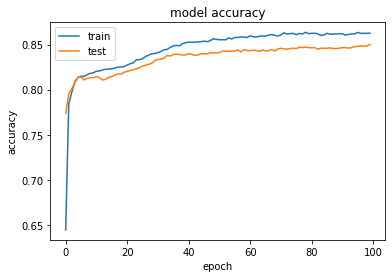

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

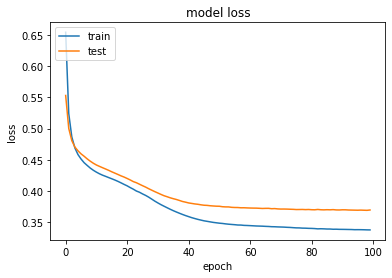

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
print(score)

0.852
